# Boundary value problem

$$y''=f(x,y,y') ~~~ with~~ y(a)=\alpha ,~~y(b)=\beta$$

## Shooting method (Second-Order Differential Equation)

1. $x=a , x=b$의 조건을 가진 2차 미분방정식이 있다.

$$y''=f(x,y,y') ~~~ with~~ y(a)=\alpha ,~~y(b)=\beta$$


2. 1번의 경계치 문제를 초기치 문제로 바꾼다.

$$y''=f(x,y,y') ,~~ y(a)=\alpha ,~~y'(a)=u$$

3. $y'(a)=u$이므로 $y(b)$는 $u$의 함수로 표현 할 수 있다.

$$y(b)=\theta(u)$$

4. Root finding method를 이용해 u값을 구한다.
$$r(u)=\theta(u)-\beta=0$$

5. 구한 u값으로 2번의 초기치 문제를 푼다.


### *선형보간에 기반한 근찾기*
(1) Linear Interpolation(점2개)

$f(x)$는 근 근처에서 선형으로 가정되므로 개선된 근 $x_3$은 $x_1,x_2$사이의 선형보간에 의해 추정된다.

미분방정식이 선형일 경우 2점 선형보간으로 충분.

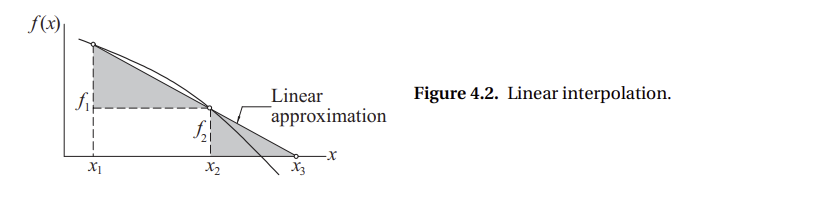

In [38]:
from IPython.display import Image
Image(filename='1.png',width="800")

$$\frac{f_2}{x_3- x_2} = \frac{f_1-f_2}{x_2-x_1}$$

$$x_3 = x_2 -f_2\frac{x_2-x_1}{f_2-f_1}$$

(2) Ridder's method(점3개)

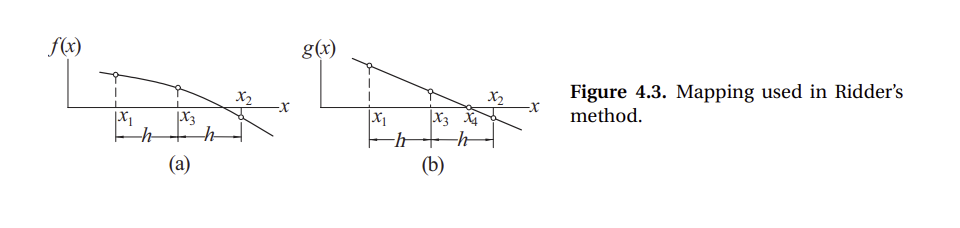

In [14]:
Image(filename='9.png',width="800")

- $f_3 =f(x_3)$을 계산한다. 여기서 $x_3=(x_1+x_2)/2$ 이다. (a 그림 참고) 
<br>
<br>

- $g(x)=f(x)e^{(x-x_1)Q}$ 를 이용해 선형보간 한다: $(x_1,g_1) , (x_2,g_2) ,(x_3,g_3)$는 직선에 놓여있음.

 위 식에 의해 $g_1 = f_1 , ~g_2=f_2e^{2hQ} ,~g_3=f_3 e^{hQ}$ 이고 $h=(x_2-x_1)/2$ 이다.
<br>


- 3점이 직선 상에 있어야 하므로 $g_3=(g_1+g_2)/2$이다.

 즉 $f_3 e^{hQ} = \frac{1}{2} (f_1+f_2e^{2hQ})$ 인 $e^{hQ}$의 2차 방정식이고 <br>
 근은 $e^{hQ} = \frac{f_3 ± \sqrt{f_3^2 -f_1f_2}}{f_2}$ 이다.
 <br>
 
 
 - $(x_1,g_1) , (x_3,g_3)$을 기반으로 한 선형보간으로 더 나은 근을 구한다.<br>
  $x_4 = x_3 - g_3\frac{x_3-x_1}{g_3-g_1} = x_3 -f_3 e^{hQ} \frac{x_3-x_1}{f_3 e^{hQ}- f_1}=x_3±(x_3-x_2)\frac{f_3}{\sqrt{f_3^2-f_1f_2}} $

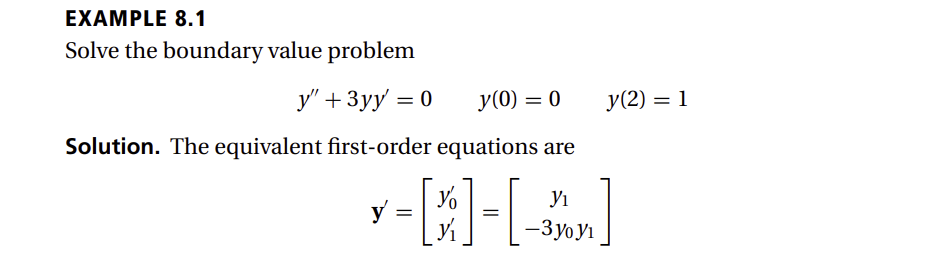

In [15]:
Image(filename='3.png',width="800")

In [12]:
import sys
sys.path.append('myModules')

In [13]:
## example8_1 (비선형)
import numpy as np
from run_kut4 import *
from ridder import *


# y(0)=0 , y(2)=1 =    θ(u)
# y(0)=0  , y'(0)=u
# r(u) = θ(u)-1=0

def initCond(u): # Init. values of y = [y,y’]; use ’u’ if unknown
    return np.array([0.0, u])

def r(u): # r(u) = θ(u)-1 인 r찾기.
    X,Y = integrate(F,xStart,initCond(u),xStop,h) 
    #y(0)=0  , y'(0)=u를 (initCond)사용해서 초기값 문제를 푼다. 그럼 Y=[y,y']은 u에 대한 식으로 표현될 것.
    #  x       y       y'
    #  .       .       .
    
    
    y = Y[len(Y) - 1] #θ(u)=y(2)이므로 x=2(stop)일때 Y를 찾는다.
    
    r = y[0] - 1.0 #x=2인 값 중 y(2)는 y[0] 이고 r(u) = θ(u)-1로 표현.
    
    return r

def F(x,y): # First-order differential equations
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -3.0*y[0]*y[1]
    return F

xStart = 0.0 # Start of integration
xStop = 2.0 # End of integration
u1 = 1.0 # 1st trial value of unknown init. cond.
u2 = 2.0 # 2nd trial value of unknown init. cond.
h = 0.1 # Step size

u = ridder(r,u1,u2) # root finding method로 u를 구한다음에,

X,Y = integrate(F,xStart,initCond(u),xStop,h) # 정확한 적분값 구함.

X1=X.reshape(21,1)
XY=np.concatenate([X1,Y],1)
XY

array([[0.        , 0.        , 1.51452253],
       [0.1       , 0.15031188, 1.48063106],
       [0.2       , 0.29404453, 1.38482498],
       [0.3       , 0.42572218, 1.24265547],
       [0.4       , 0.54170442, 1.07434663],
       [0.5       , 0.64037616, 0.89938933],
       [0.6       , 0.72187149, 0.73286528],
       [0.7       , 0.78754998, 0.58416242],
       [0.8       , 0.83944329, 0.45751925],
       [0.9       , 0.87980689, 0.35342814],
       [1.        , 0.91082129, 0.27012641],
       [1.1       , 0.9344291 , 0.20478372],
       [1.2       , 0.95227088, 0.15429109],
       [1.3       , 0.96568212, 0.11570819],
       [1.4       , 0.97572206, 0.08647101],
       [1.5       , 0.98321528, 0.064453  ],
       [1.6       , 0.98879505, 0.047948  ],
       [1.7       , 0.99294295, 0.03561796],
       [1.8       , 0.99602253, 0.0264302 ],
       [1.9       , 0.99830681, 0.0195968 ],
       [2.        , 1.        , 0.01452154]])

단순보 (단순지지보, simply supported)

: 한쪽끝은 핀지지로 다른 쪽은 롤러지지된 보를 지칭하며 핀이 보 끝의 이동은 억제하지만 회전을 억제하지 않는다. 핀지지는 힘의 반력, 수직과 수평방향 분력을 일으킬수 있으나 모멘트 반력은 일으킬수 없다.

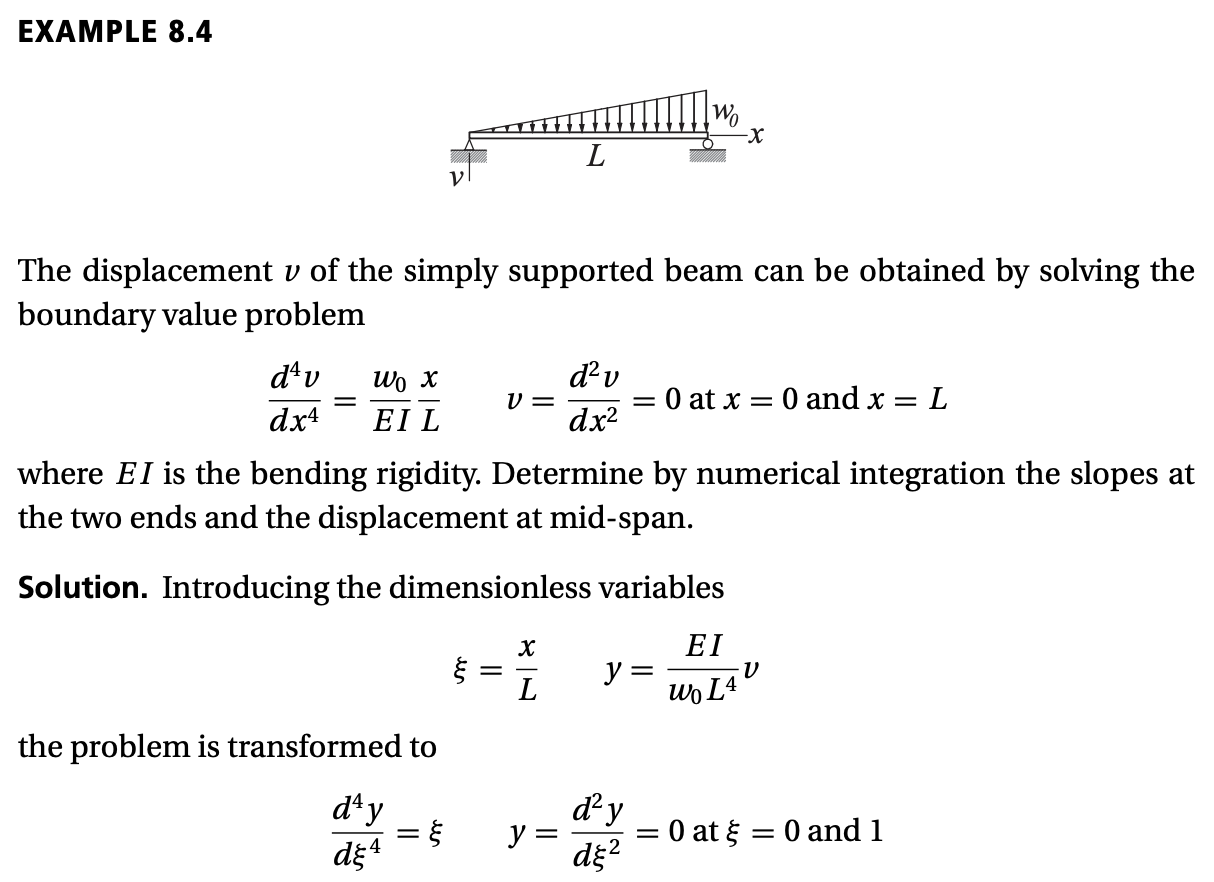

In [28]:
Image(filename='Example8.4.png',width="800") 

$$y=\begin{bmatrix}y\\ y'\\y''\\y''' \end{bmatrix} , F=\begin{bmatrix}y' \\y''\\y'''\\y'''' \end{bmatrix}$$

$$y(0) = 0 , ~~y''(0)=0 , ~~y(1)=0 , ~~y''(1)=0$$

We have to know **$\xi=0~~: y(0) ,~~ y'(0) ,~~ y''(0) ,~~ y'''(0) $**

So We set, $$y'(0) =u_1 ,~~ y'''(0)=u_2$$

Then $$y(1) = 0 = \theta_1(u_1,u_2),~~ y''(1) = 0 = \theta_2(u_1,u_2)$$

We can get $r(u) = \theta(u_1,u_2)$

In [14]:
import numpy as np
#from bulStoer import *
from RK4_integrate import *
from newtonRaphson2 import *
from printSoln import *
# v^(4) = omega/(EI)*(x/L), v^(2) = v = 0 at x=0 and x=L
# xi = x/L, y = (EI)/(w0 L^4) v

def initCond(u): # Initial values of [y,y’,y",y"’];
    return np.array([0.0, u[0], 0.0, u[1]])

def r(u): # Boundary condition residuals--see Eq. (8.7)
    r = np.zeros(len(u))
    X,Y = RK4_integrate(F,xStart,initCond(u),xStop,H)
    y = Y[len(Y) - 1] #xi=1에서의 y값들을 얻기 위함.
    r[0] = y[0] # y(1) -0 
    r[1] = y[2] # y''(1) -0 
    return r 

def F(x,y): # First-order differential equations
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[2]
    F[2] = y[3]
    F[3] = x #xi
    return F

xStart = 0.0 # Start of integration
xStop = 1.0 # End of integration
u = np.array([0.0, 1.0]) # Initial guess for {u} newtonrapshon에서 초기값이 필요했음.
H = 0.5 # Printout increment
freq = 1 # Printout frequency

u = newtonRaphson2(r,u,1.0e-4)
X,Y =RK4_integrate(F,xStart,initCond(u),xStop,H)
printSoln(X,Y,freq)



   x   y[ 0 ]   y[ 1 ]   y[ 2 ]   y[ 3 ]  
   0.0000e+00    0.0000e+00    1.9965e-02    0.0000e+00   -1.6667e-01 
   5.0000e-01    6.5104e-03    1.7361e-03   -6.2500e-02   -4.1667e-02 
   1.0000e+00   -1.9229e-14   -2.1701e-02   -1.2864e-13    3.3333e-01 


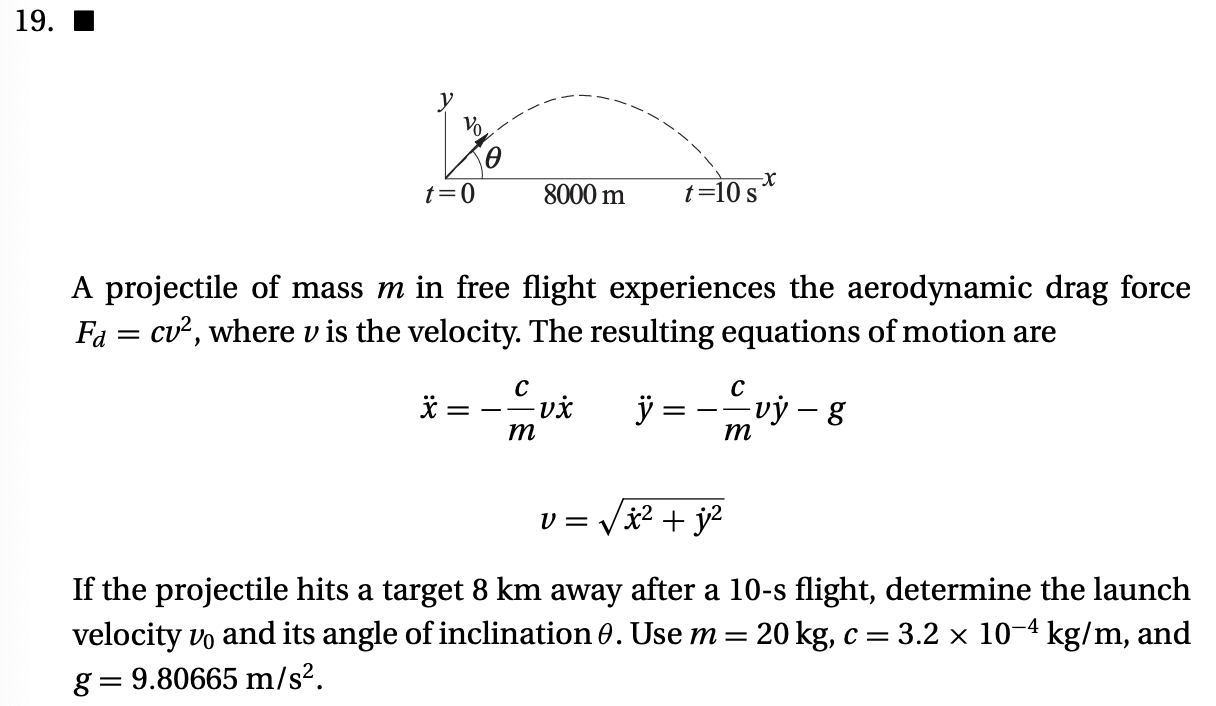

In [24]:
Image(filename='Chap8_Problem19.png',width="800")

In [37]:
# Problem 19.
import numpy as np
# from run_kut5 import *
from RK5_integrate import *
from newtonRaphson2 import *
from printSoln import *
from math import sqrt
# Parameters
m = 20 # kg
c = 3.2e-4 # kg/m
g = 9.80665 # m/s^2
def initCond(u): # Init. values of [y,y’]; use ’u’ if unknown
     u1 = u[0]
     u2 = u[1]
     return np.array([0.0, u1, 0.0, u2])
    
def r(u): # Boundary condition residual--see Eq. (8.3)
     r = np.zeros(len(u))
     X,Y = RK5_integrate(F,xStart,initCond(u),xStop,h)
     # y = Y[len(Y) - 1]
     y = Y[-1] # find y at 2
     r[0] = y[0] - 8000 # check x values whether is 8000m
     r[1] = y[2] - 0.0 # check y values whether is 0m
     return r
    
def F(x,y): # First-order differential equations
    F = np.zeros(len(y))
    v = sqrt(y[1]**2 + y[3]**2)
    fac = c/m
    F[0] = y[1] # v_x
    F[1] = -fac*y[1] # a_x
    F[2] = y[3] # v_y
    F[3] = -fac*y[3] - g # a_y
    return F

xStart = 0.0 # Start of integration
xStop = 10.0 # End of integration
u = np.array([-1.0, 1.0]) # two trial value of unknown init. cond.
h = 0.1 # Step size
u = newtonRaphson2(r,u,1.0e-5) # Compute the correct initial condition
X,Y = RK5_integrate(F,xStart,initCond(u),xStop,h)
freq = 2 # Printout frequency
printSoln(X,Y,freq)
# input("\nPress return to exit")


   x   y[ 0 ]   y[ 1 ]   y[ 2 ]   y[ 3 ]  
   0.0000e+00    0.0000e+00    8.0006e+02    0.0000e+00    4.9035e+01 
   1.1000e+00    8.8006e+02    8.0005e+02    4.8005e+01    3.8246e+01 
   1.0000e+01    8.0000e+03    7.9994e+02   -6.5819e-08   -4.9032e+01 


## Finite Difference Method

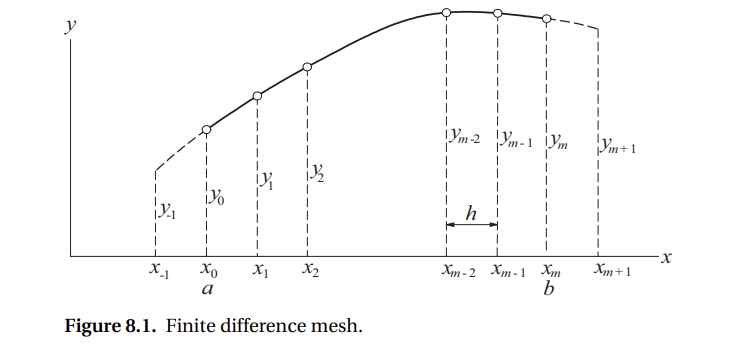

In [40]:
Image(filename='17.png',width="600")

### Second Order Differential Equation.
$$y''=f(x,y,y')$$
경계조건은 a에서 함숫값, 미분값 중 하나, b에서 함숫값 , 미분값중 하나가 주어져있다고 가정.
$$y(a)=\alpha ~~or~~ y'(a)=\alpha$$
$$y(b)=\beta ~~or~~ y'(b)=\beta$$

Using finite defferences,
$$\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} = f \Big(x_i , y_i ,\frac{y_{i+1}-y_{i-1}}{2h}\Big) ,~~~~ i =0,1,...,m$$
$$y_0=\alpha ~~or~~ \frac{y_1-y_{-1}}{2h}=\alpha$$
$$y_m=\beta ~~or~~ \frac{y_{m+1}-y_{m-1}}{2h}=\beta$$

$$i=0 : ~~~~~~~~~~~~~~~~~~~~
y_{-1}-2y_0 +y_1 - h^2f(x_0,y_0,\frac{y_1-y_{-1}}{2h})=0$$

$$i=1,2...m-1 : ~~~~~~
y_{i-1}-2y_i +y_{i+1} - h^2f(x_i,y_i,\frac{y_{i+1}-y_{i-1}}{2h})=0$$

$$i=m : ~~~~~~~~~~~~~~~~~~~~~~
y_{m-1}-2y_m +y_{m+1} - h^2f(x_m,y_m,\frac{y_{m+1}-y_{m-1}}{2h})=0$$

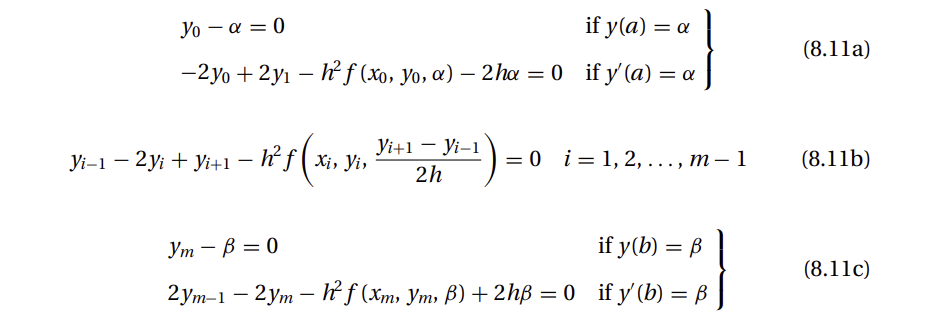

In [44]:
Image(filename='35.png',width="800")

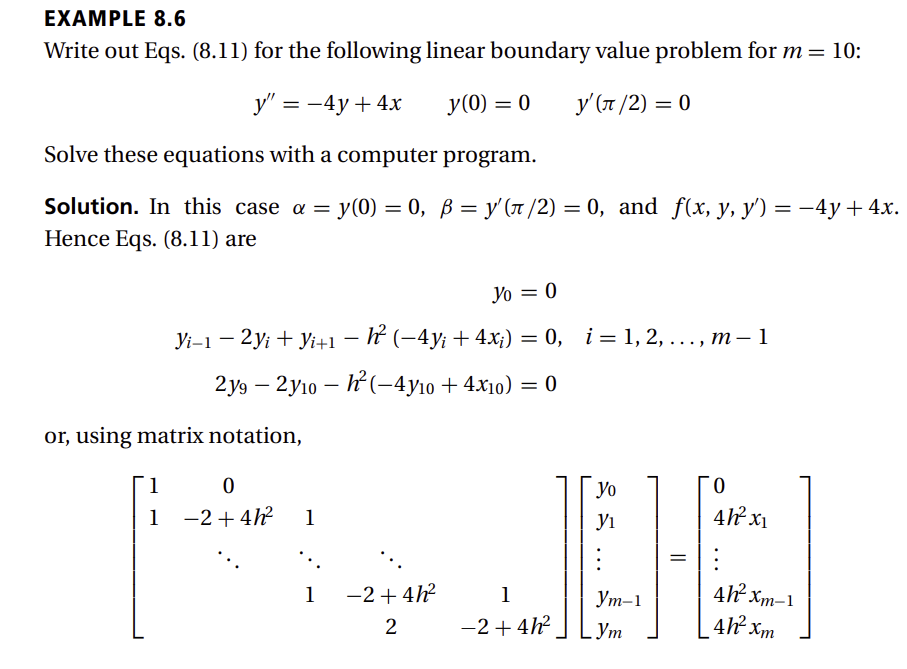

In [45]:
Image(filename='30.png',width="800")

In [49]:
## example8_6
import numpy as np
from LUdecomp3 import *
import math
def equations(x,h,m): # Set up finite difference eqs.
    h2 = h*h
    d = np.ones(m + 1)*(-2.0 + 4.0*h2) #대각선
    c = np.ones(m)
    e = np.ones(m)
    b = np.ones(m+1)*4.0*h2*x
    d[0] = 1.0
    e[0] = 0.0
    b[0] = 0.0
    c[m-1] = 2.0
    return c,d,e,b

xStart = 0.0 # x at left end
xStop = math.pi/2.0 # x at right end

m = 10 # Number of mesh spaces

h = (xStop - xStart)/m
x = np.arange(xStart,xStop + h,h)

c,d,e,b = equations(x,h,m)
c,d,e = LUdecomp3(c,d,e) #3중대각행렬 만들기
y = LUsolve3(c,d,e,b) #y풀기.
print("\n x y")
for i in range(m + 1):
    print('{:14.5e} {:14.5e}'.format(x[i],y[i]))
input("\nPress return to exit")


 x y
   0.00000e+00    0.00000e+00
   1.57080e-01    3.14173e-01
   3.14159e-01    6.12841e-01
   4.71239e-01    8.82030e-01
   6.28319e-01    1.11068e+00
   7.85398e-01    1.29172e+00
   9.42478e-01    1.42278e+00
   1.09956e+00    1.50645e+00
   1.25664e+00    1.54995e+00
   1.41372e+00    1.56451e+00
   1.57080e+00    1.56418e+00

Press return to exit


''

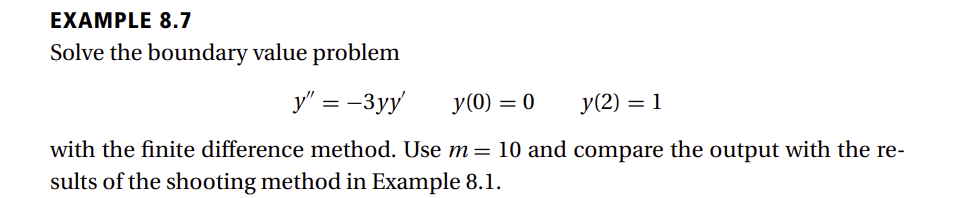

In [51]:
Image(filename='31.png',width="800")

In [57]:
#비선형 문제 -> newtonraphson
## example8_7
import numpy as np
from newtonRaphson2 import *
def residual(y): # Residuals of finite diff. Eqs. (8.11)
    r = np.zeros(m + 1)
    r[0] = y[0] #왼쪽 경계
    r[m] = y[m] - 1.0 #오른쪽 경계
    for i in range(1,m):
        r[i] = y[i-1] - 2.0*y[i] + y[i+1] \
        - h*h*F(x[i],y[i],(y[i+1] - y[i-1])/(2.0*h))
    return r

def F(x,y,yPrime): # Differential eqn. y" = F(x,y,y’)
    F = -3.0*y*yPrime
    return F

def startSoln(x): # 책에 나와있는대로 초기해 y_i =0.5x_i로 지정 뉴턴랩슨방법은 초기해 필요.
    y = np.zeros(m + 1)
    for i in range(m + 1): 
        y[i] = 0.5*x[i]
    return y

xStart = 0.0 # x at left end
xStop = 2.0 # x at right end
m = 10 # Number of mesh intervals
h = (xStop - xStart)/m
x = np.arange(xStart,xStop + h,h)
y = newtonRaphson2(residual,startSoln(x),1.0e-5)
print ('\n x y')
for i in range(m + 1):
    print ("%14.5e %14.5e" %(x[i],y[i]))


 x y
   0.00000e+00    0.00000e+00
   2.00000e-01    3.02404e-01
   4.00000e-01    5.54503e-01
   6.00000e-01    7.34691e-01
   8.00000e-01    8.49794e-01
   1.00000e+00    9.18132e-01
   1.20000e+00    9.56953e-01
   1.40000e+00    9.78457e-01
   1.60000e+00    9.90201e-01
   1.80000e+00    9.96566e-01
   2.00000e+00    1.00000e+00


## Fourth -Order Differential Equation

*y' , y''이 나타나지 않는 경우*
$$y''''=f(x,y,y'')$$

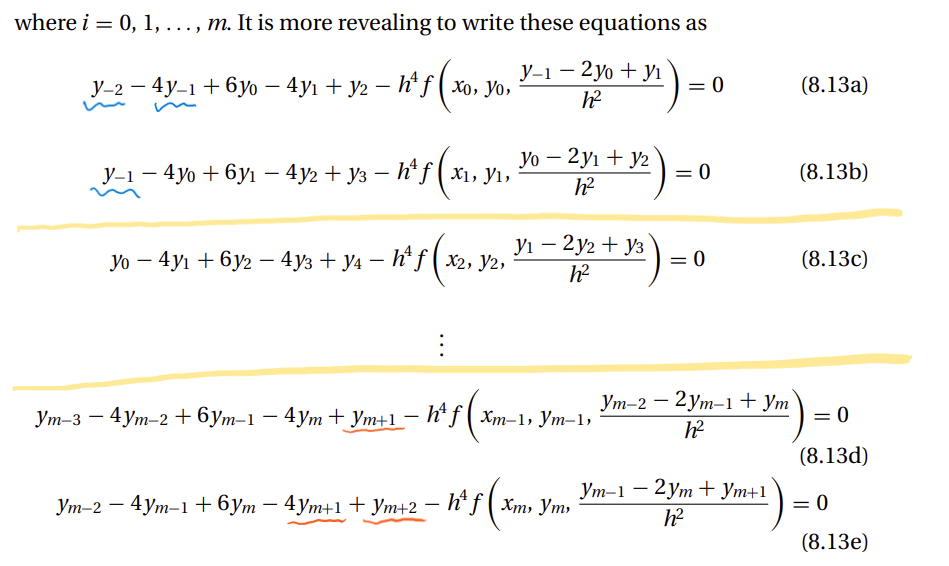

In [62]:
Image(filename='14.png',width="800")

In [ ]:
# a,b는 왼쪽 경계영역
# d,e는 오른쪽 경계영역

# 아래 테이블을 사용해서 y_-1,y_-2 , y_m+1,y_m+2 를 알 수 있음.

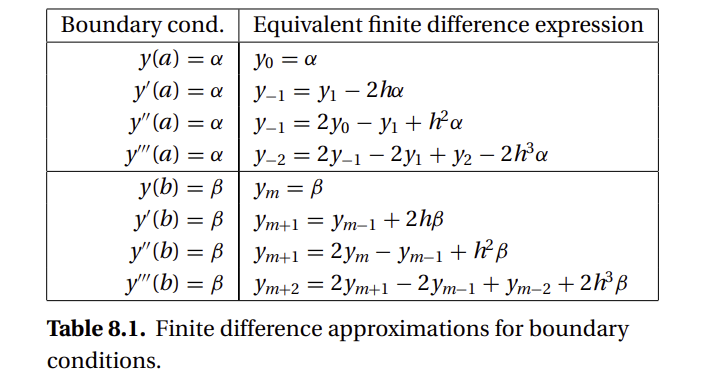

In [61]:
Image(filename='13.png',width="500")

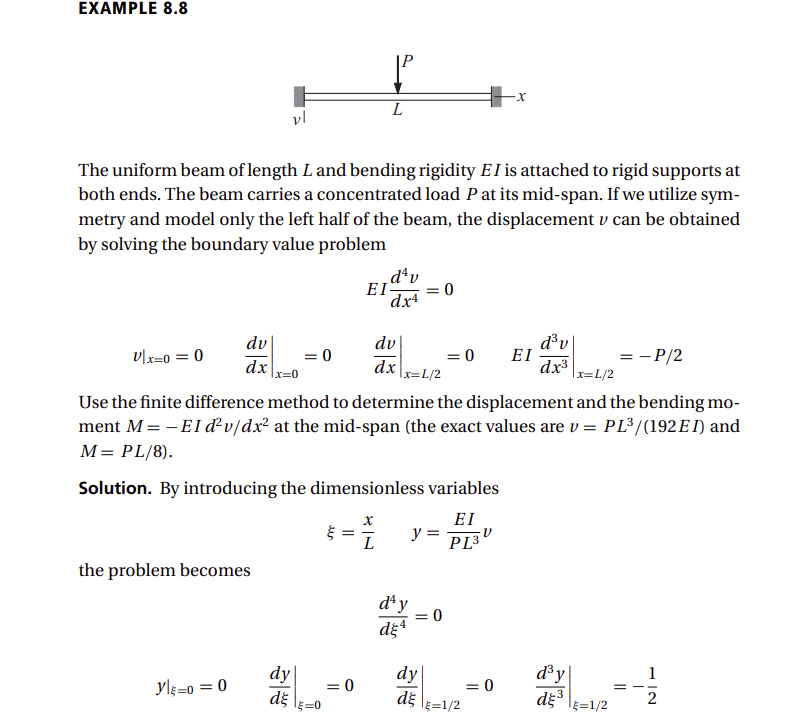

In [64]:
Image(filename='32.png',width="800")

8.13a는 문제에서 제공된 $y_0=0$ 에 의해 
$$y_0 = 0 ~~~~~~~~~~~~(a)$$

Table8.1에 의해 $y_{-1}=y_1$ 이므로 8.13b는
$$-4y_0 + 7y_1 - 4y_2+y_3=0~~~~~~~~~~~~~~~~~~~(b)$$

8.13c는 $$y_0-4y_1+6y_2-4y_3+y_4=0~~~~~~~~~~~~~~~~~(c)$$

8.14d와 e는 table8.1에 의해 $y_{m+1}=y_{m-1} , y_{m+2}=2y_{m+1}-2y_{m-1}++y_{m-2}+2h^3(-1/2)=y_{m-2}-h^3$
이므로 

$$y_{m-3}-4y_{m-2}+7y_{m-1}-4y_m=0~~~~~~~~~~~~~~(d)$$
$$2y_{m-2}-8y_{m-1}+6y_m=h^3~~~~~~~~~~~~~~~~~~(e)$$

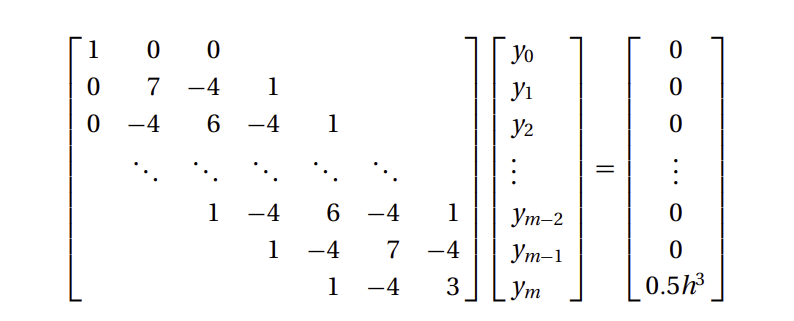

In [66]:
Image(filename='12.png',width="800")

In [69]:
## example8_8
import numpy as np
from LUdecomp5 import *
def equations(x,h,m): # Set up finite difference eqs.
    h4 = h**4
    d = np.ones(m + 1)*6.0
    e = np.ones(m)*(-4.0)
    f = np.ones(m-1)
    b = np.zeros(m+1)

    d[0] = 1.0
    d[1] = 7.0
    e[0] = 0.0
    f[0] = 0.0
    d[m-1] = 7.0
    d[m] = 3.0
    b[m] = 0.5*h**3
    return d,e,f,b
xStart = 0.0 # x at left end
xStop = 0.5 # x at right end
m = 20 # Number of mesh spaces
h = (xStop - xStart)/m
x = np.arange(xStart,xStop + h,h)
d,e,f,b = equations(x,h,m)
d,e,f = LUdecomp5(d,e,f)
y = LUsolve5(d,e,f,b)
print('\n x y')
print('{:14.5e} {:14.5e}'.format(x[m-1],y[m-1]))
print('{:14.5e} {:14.5e}'.format(x[m],y[m]))


 x y
   4.75000e-01    5.19531e-03
   5.00000e-01    5.23438e-03
